In [15]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols, rlm
from statsmodels.tsa.api import adfuller, ARIMA
from statsmodels.stats.diagnostic import het_arch, het_breushpagan, het_white, acorr_breush_godfrey, acorr_ljungbox
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import pacf, plot_acf, plot_pacf

In [16]:
%matplotlib inline

In [17]:
sns.set(style='ticks', palette='Set2')

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [50]:
data = pd.read_excel('USMacro_Quarterly.xls', parse_dates=True, index_col=0)
t = pd.date_range(start='1947Q1', periods=232, freq='Q')
data.index = t
data.columns = ['y', 'r']

In [51]:
data.tail()

,y,r
2003-12-31,10580.7,0.91667
2004-03-31,10697.5,0.91667
2004-06-30,10784.7,1.07667
2004-09-30,10891.0,1.48667
2004-12-31,10994.3,2.00667


In [52]:
d = data.loc['1995Q1':'2003Q4']

In [53]:
d.head()

,y,r
1995-03-31,7973.7,5.73667
1995-06-30,7988.0,5.59667
1995-09-30,8053.1,5.36667
1995-12-31,8112.0,5.26000
1996-03-31,8169.2,4.93000


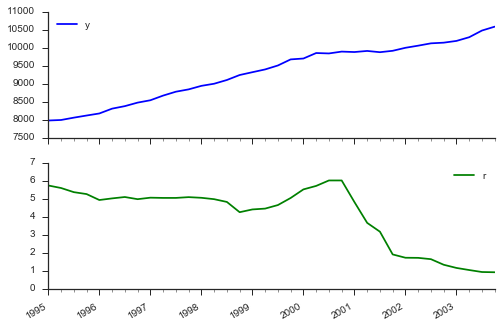

In [54]:
d.plot(subplots=True, layout=(2,1))
sns.despine()

In [57]:
res = d.copy()
for r in [res, res.diff(), res.diff().diff(), res.diff().diff().diff()]:
    print(r.std())
    print()

y    790.502751
r      1.690877
dtype: float64

y    50.326938
r     0.394965
dtype: float64

y    64.976127
r     0.392679
dtype: float64

y    117.482368
r      0.638118
dtype: float64



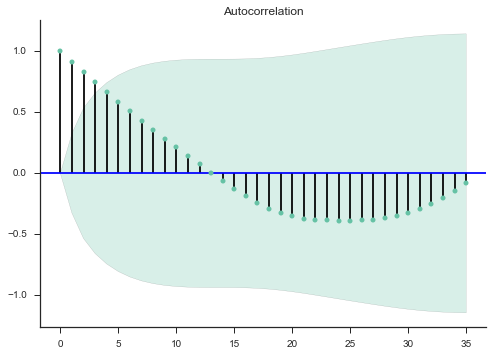

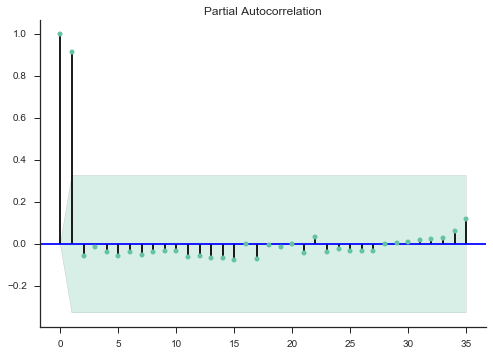

In [69]:
i = d.y
_ = plot_acf(i)
sns.despine()
_ = plot_pacf(i)
sns.despine()

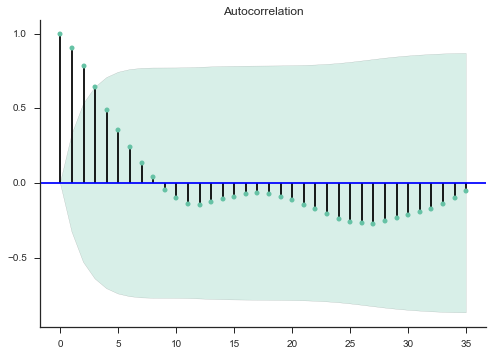

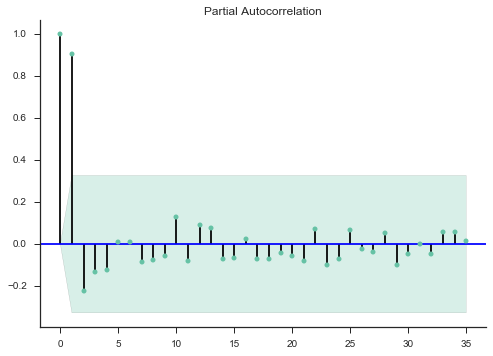

In [68]:
i = d.r
_ = plot_acf(i)
sns.despine()
_ = plot_pacf(i)
sns.despine()

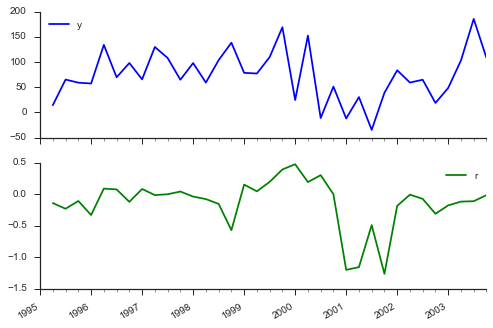

In [62]:
d.diff().plot(subplots=True, layout=(2,1))
sns.despine()

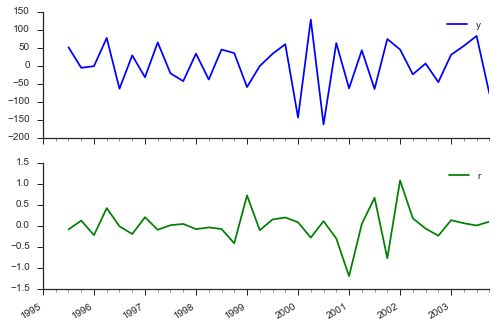

In [63]:
d.diff().diff().plot(subplots=True, layout=(2,1))
sns.despine()

In [70]:
adfuller(d.y, regression='ct')

(-3.5672409032939827,
 0.032727784562370001,
 10,
 25,
 {'1%': -4.3749647199999995,
  '10%': -3.2381863200000001,
  '5%': -3.6034675359999997},
 266.54954726869641)

In [81]:
r = adfuller(d.y, autolag='AIC', regresults=True)

In [90]:
r[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.2923
Date:                Wed, 02 Dec 2015   Prob (F-statistic):              0.592
Time:                        16:46:52   Log-Likelihood:                -186.15
No. Observations:                  35   AIC:                             376.3
Df Residuals:                      33   BIC:                             379.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0061      0.011     -0.541      0.592        -0.029     0.017
const        131.1959    105.252      1.246      0.221       -82.941   345.333
==============================================================================
Omnibus:                        0.358   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.190
Skew:                           0.175   Prob(JB):                        0.909
Kurtosis:                       2.911   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
r

(-0.54060951962625048,
 0.88384526661378926,
 {'1%': -3.6327426647230316,
  '10%': -2.6130173469387756,
  '5%': -2.9485102040816327},
 <statsmodels.tsa.stattools.ResultsStore at 0x115e26630>)